# Gag-MCP becomes partially silenced over 7 days of induction

# Introduction

## Imports

In [1]:
import sys
import os
import time

import numpy as np
import scipy
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns

## Set output parameters

In [2]:
# Set pandas display options
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

# Set plot display options
FONTSIZE = 8  # universal fontsize
params = {
    'font.size': FONTSIZE,
    'axes.titlesize': FONTSIZE,
    'axes.labelsize': FONTSIZE,
    'legend.fontsize': FONTSIZE,
    'xtick.labelsize': FONTSIZE,
    'ytick.labelsize': FONTSIZE,
    'font.family': "Helvetica",
    'mathtext.fontset': 'custom',
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.dpi': 300
   }
mpl.rcParams.update(params)
sns.set_style("ticks", {'axes.grid' : False})

# Set plot output options
output_dir = "outs/flow_silencing"
output_suffix = ""
output_formats = [".png", ".pdf"]

mpl.rc('savefig', dpi=300)

# Define convenience function for saving figures

savefig = True
savefig_args = {"dpi": 300, "bbox_inches": "tight", "pad_inches": 0.1}

def save_figure(fig, name, output_dir=output_dir, output_suffix=output_suffix, output_formats=output_formats, savefig_args=savefig_args):
    if savefig:
        for output_format in output_formats:
            fig.savefig(output_dir + "/" + name + output_suffix + output_format, **savefig_args)
    return None

In [3]:
# Report plot parameters
sns.plotting_context()

{'font.size': 8.0,
 'axes.labelsize': 8.0,
 'axes.titlesize': 8.0,
 'xtick.labelsize': 8.0,
 'ytick.labelsize': 8.0,
 'legend.fontsize': 8.0,
 'legend.title_fontsize': None,
 'axes.linewidth': 0.8,
 'grid.linewidth': 0.8,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 0.8,
 'ytick.major.width': 0.8,
 'xtick.minor.width': 0.6,
 'ytick.minor.width': 0.6,
 'xtick.major.size': 3.5,
 'ytick.major.size': 3.5,
 'xtick.minor.size': 2.0,
 'ytick.minor.size': 2.0}

# Load data

In [4]:
infile = "../preprocessed_data/flow_data/flow_silencing_summary.csv"

df_raw = pd.read_csv(infile, index_col=None)

print(df_raw.shape)
df_raw

(16, 6)


,Sample,Time_days,Replicate,GFP+,Cells,Label
0,dox,0,1,98.20000,17886,induced (+dox)
1,dox,0,2,98.20000,18870,induced (+dox)
2,dox,3,1,89.10000,4483,induced (+dox)
3,dox,3,2,90.10000,6398,induced (+dox)
4,dox,5,1,95.80000,12509,induced (+dox)
5,dox,5,2,93.70000,10292,induced (+dox)
6,dox,7,1,91.60000,15961,induced (+dox)
7,dox,7,2,89.40000,11110,induced (+dox)
8,no_dox,0,1,0.00519,1,not induced (-dox)
9,no_dox,0,2,0.00510,1,not induced (-dox)


# Preprocess data

In [5]:
# Summarize replicates
summary = df_raw.groupby(["Sample", "Time_days"]).describe()["GFP+"][["mean", "std"]]

# Transfer label column to summary dataframe
col = df_raw.set_index(["Sample", "Time_days"]).loc[summary.index]["Label"].reset_index().drop_duplicates().set_index(["Sample", "Time_days"])
summary["Label"] = col

summary

mean       std               Label
Sample Time_days                                         
dox    0          98.200000  0.000000      induced (+dox)
       3          89.600000  0.707107      induced (+dox)
       5          94.750000  1.484924      induced (+dox)
       7          90.500000  1.555635      induced (+dox)
no_dox 0           0.005145  0.000064  not induced (-dox)
       3           0.011000  0.015556  not induced (-dox)
       5           0.017500  0.024749  not induced (-dox)
       7           0.009500  0.013435  not induced (-dox)

# Plot exporter expression across time (% GFP+ cells)

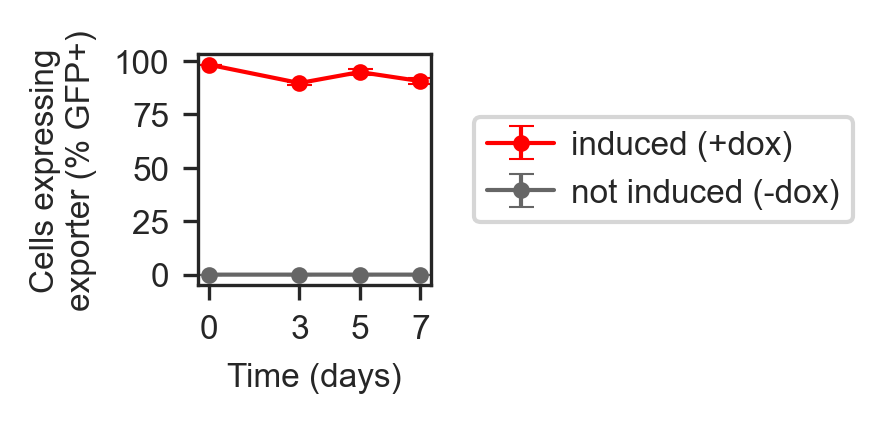

In [6]:
palette = ["r", "#666666"]

data = summary.reset_index()

fig, ax = plt.subplots(1, 1, figsize=(1, 1))

data_subset = data.loc[data["Sample"] == "dox"]
ax.errorbar(x=data_subset["Time_days"],
            y=data_subset["mean"],
            yerr=data_subset["std"],
            color=palette[0],
            marker=".",
            capsize=3,
            capthick=0.5,
            lw=1,
            label="induced (+dox)")


data_subset = data.loc[data["Sample"] == "no_dox"]
ax.errorbar(x=data_subset["Time_days"],
            y=data_subset["mean"],
            yerr=data_subset["std"],
            color=palette[1],
            marker=".",
            capsize=3,
            capthick=0.5,
            lw=1,
            label="not induced (-dox)")

ax.set_xlabel("Time (days)")
ax.set_ylabel("Cells expressing\nexporter (% GFP+)")

ax.set_xticks([0, 3, 5, 7])
ax.set_yticks([0, 25, 50, 75, 100])

plt.legend(loc="center", bbox_to_anchor=(2, 0.5), markerscale=1, handletextpad=0.5)

save_figure(fig, "exporter_expression_over_time")

In [7]:
# Report values
data

,Sample,Time_days,mean,std,Label
0,dox,0,98.200000,0.000000,induced (+dox)
1,dox,3,89.600000,0.707107,induced (+dox)
2,dox,5,94.750000,1.484924,induced (+dox)
3,dox,7,90.500000,1.555635,induced (+dox)
4,no_dox,0,0.005145,0.000064,not induced (-dox)
5,no_dox,3,0.011000,0.015556,not induced (-dox)
6,no_dox,5,0.017500,0.024749,not induced (-dox)
7,no_dox,7,0.009500,0.013435,not induced (-dox)
